In [1]:
 #Modarres - Ex 4.25
    
from sympy import *
init_session()
from sympy.stats import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

F, a, b, R, mttf, l ,t1=symbols('F a b R mttf l t1')

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



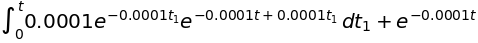

In [26]:

la=0.0001

Ra=exp(-la*t)
fa=la*exp(-la*t)
Rab=Ra+Integral(fa.subs({t:(t1)})*Ra.subs({t:(t-t1)}),(t1,0,t))
Rab

In [27]:
Rab=Ra+integrate(fa.subs({t:(t1)})*Ra.subs({t:(t-t1)}),(t1,0,t))
Rab

In [3]:
Rabcd=1-(1-Rab)**2
expand(Rabcd)

In [4]:
Rabcd_1000 = Rabcd.subs({t:1000})
Rabcd_1000



In [32]:
Fabcd_1000= 1-Rabcd_1000
Fe=Fabcd_1000/0.9-Fabcd_1000
Re=1-Fe
Re

In [6]:
#Re=exp(-le*1000)
#ln(Re)=-le*1000
le_max=log(Re)/-1000
le_max

In [40]:
Rsys_1000=Rabcd_1000*Re
Rsys_1000
Fsys_1000=1-Rsys_1000


In [8]:
MTTF_abcd=integrate(Rabcd,(t,0,oo))#apenas para entender como é a curva da confiabilidade de dois componentes em standby
MTTF_abcd

In [9]:
Re= exp(-le_max*t)
MTTF_e = integrate(Re,(t,0,oo))
MTTF_e

In [10]:
Re_1000 = Re.subs({t:1000})
Re_1000

In [56]:
l_abcd=1/MTTF_abcd
Req=exp(-l_abcd*t) #apenas para entender como é a curva da confiabilidade de dois componentes em standby
vector = np.arange(0,40000,10)
def predict(var):
    return Rabcd.subs({t:var})

def predict2(var):
    return Req.subs({t:var})

def predict3(var):
    return Ra.subs({t:var})


predict_v = np.vectorize(predict)
predict2_v = np.vectorize(predict2)
predict3_v = np.vectorize(predict3)
plt.plot(vector,predict_v(vector),label='Rabcd(t)')
plt.plot(vector,predict2_v(vector),label='Req(t)')
#plt.plot(vector,predict3_v(vector))
plt.legend(loc='best')
plt.xlabel('Tempo (horas)')
plt.ylabel('Confiabilidade')
plt.grid()
plt.ylim(0,1)
plt.xlim(0,40000)

In [29]:
integrate(Req,(t,0,oo))

In [42]:
#outra forma de resolver. REsultado mais preciso. 
#Fe2=0.1*Fsys
#Fe2=0.1*(1-Rsys)
#Fe2=0.1*(1-Re2*Rabcd)
#Fe2=0.1*(1-(1-Fe2)*Rabcd)
#10Fe2=1+Fe2*Rabcd-Rabcd
#10Fe2-Rabcd*Fe2=1-Rabcd
#(10-Rabcd)*Fe2= 1-Rabcd
Fe2=(1-Rabcd_1000)/(10-Rabcd_1000)
Fe2
    

In [43]:
Re2=1-Fe2
le_max2=log(Re2)/-1000
le_max2

In [46]:
Rsys2_1000=Rabcd_1000*Re2
Rsys2_1000


In [52]:
Fsys2_1000=1-Rsys2_1000
Fe2/Fsys2_1000

In [53]:
le_max-le_max2

In [54]:
Rteste=exp(-le_max2*1000)
Rteste-Re2